# Part II: Feature Engineering
Right now, only coordinates and time are available. In Part II, the most important pieces of information in the CSV is extracted and simplified for subsequent Parts. 

In this notebook, the following has been done:
1. Load the CSV obtained from Part I
2. Convert the string representation of lists as actual lists
3. Divide the coordinates of taxis into different sectors
4. Engineer new features out of the time data
5. Drop unneeded columns
6. Export the engineered DataFrame

### Step 1: Import the following libraries
- pandas

In [1]:
# Step 1: Import pandas
import pandas as pd

### Step 2: Read the CSV from Part I
Read the CSV from Part I as a DataFrame.

In [2]:
# Step 2: Read the CSV
data = pd.read_csv('DataFrame.csv')
display(data)

,Unnamed: 0,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status,time
0,0,Feature,MultiPoint,"[[103.6267, 1.307992], [103.63226, 1.30884], [...",2018-12-31T23:59:44+08:00,5887,healthy,2019-01-01 00:00
1,0,Feature,MultiPoint,"[[103.63213, 1.31121], [103.63766, 1.30045], [...",2019-01-01T00:04:44+08:00,4001,healthy,2019-01-01 00:05
2,0,Feature,MultiPoint,"[[103.63145, 1.31125], [103.6376, 1.300248], [...",2019-01-01T00:09:44+08:00,5981,healthy,2019-01-01 00:10
3,0,Feature,MultiPoint,"[[103.63132, 1.3216], [103.63314, 1.32474], [1...",2019-01-01T00:14:45+08:00,5461,healthy,2019-01-01 00:15
4,0,Feature,MultiPoint,"[[103.628, 1.31262], [103.63714, 1.29914], [10...",2019-01-01T00:19:45+08:00,5003,healthy,2019-01-01 00:20
...,...,...,...,...,...,...,...,...
8636,0,Feature,MultiPoint,"[[103.62689, 1.31369], [103.62953, 1.30178], [...",2019-01-30T23:39:40+08:00,5782,healthy,2019-01-30 23:40
8637,0,Feature,MultiPoint,"[[103.615898833333, 1.27034783333333], [103.62...",2019-01-30T23:44:40+08:00,5843,healthy,2019-01-30 23:45
8638,0,Feature,MultiPoint,"[[103.624481, 1.30293333333333], [103.62871, 1...",2019-01-30T23:49:40+08:00,5825,healthy,2019-01-30 23:50
8639,0,Feature,MultiPoint,"[[103.62935, 1.2973], [103.62964, 1.29373], [1...",2019-01-30T23:54:40+08:00,5783,healthy,2019-01-30 23:55


In [3]:
data = data.iloc[: , 1:]
data

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status,time
0,Feature,MultiPoint,"[[103.6267, 1.307992], [103.63226, 1.30884], [...",2018-12-31T23:59:44+08:00,5887,healthy,2019-01-01 00:00
1,Feature,MultiPoint,"[[103.63213, 1.31121], [103.63766, 1.30045], [...",2019-01-01T00:04:44+08:00,4001,healthy,2019-01-01 00:05
2,Feature,MultiPoint,"[[103.63145, 1.31125], [103.6376, 1.300248], [...",2019-01-01T00:09:44+08:00,5981,healthy,2019-01-01 00:10
3,Feature,MultiPoint,"[[103.63132, 1.3216], [103.63314, 1.32474], [1...",2019-01-01T00:14:45+08:00,5461,healthy,2019-01-01 00:15
4,Feature,MultiPoint,"[[103.628, 1.31262], [103.63714, 1.29914], [10...",2019-01-01T00:19:45+08:00,5003,healthy,2019-01-01 00:20
...,...,...,...,...,...,...,...
8636,Feature,MultiPoint,"[[103.62689, 1.31369], [103.62953, 1.30178], [...",2019-01-30T23:39:40+08:00,5782,healthy,2019-01-30 23:40
8637,Feature,MultiPoint,"[[103.615898833333, 1.27034783333333], [103.62...",2019-01-30T23:44:40+08:00,5843,healthy,2019-01-30 23:45
8638,Feature,MultiPoint,"[[103.624481, 1.30293333333333], [103.62871, 1...",2019-01-30T23:49:40+08:00,5825,healthy,2019-01-30 23:50
8639,Feature,MultiPoint,"[[103.62935, 1.2973], [103.62964, 1.29373], [1...",2019-01-30T23:54:40+08:00,5783,healthy,2019-01-30 23:55


### Step 3: Check the type of data in 'geometry.coordinates' column
This is what happens when looking at the first row's 'geometry.coordinates'.

In [4]:
# Step 3: Take a look at the first row's geometry coordinates
first_row_geo = data['geometry.coordinates'].iloc[0]
first_row_geo

'[[103.6267, 1.307992], [103.63226, 1.30884], [103.6376, 1.300256], [103.63767, 1.30045], [103.64233, 1.3272], [103.64262, 1.31503], [103.652616666667, 1.3172154], [103.66998, 1.32412], [103.67939, 1.32625], [103.68554, 1.34106], [103.6856, 1.340405], [103.688642833333, 1.340839], [103.689112833333, 1.342593], [103.69163, 1.34406], [103.6931, 1.345999], [103.6936, 1.344527], [103.69386, 1.34267], [103.6939, 1.344551], [103.694, 1.36935], [103.694041833333, 1.34023216666667], [103.69427, 1.33496], [103.69448, 1.34395], [103.6949, 1.339654], [103.694952333333, 1.346155], [103.6959465, 1.34455316666667], [103.696101833333, 1.34533483333333], [103.696348666667, 1.337731], [103.69679, 1.35138], [103.69686, 1.3412], [103.6969, 1.343948], [103.69707, 1.33207], [103.697182666667, 1.33966516666667], [103.6972442, 1.34316185], [103.697827166667, 1.33945583333333], [103.697930666667, 1.34119483333333], [103.6980042, 1.33504375], [103.69861, 1.32278], [103.69997, 1.34669], [103.700030166667, 1.340

### Step 4: Convert string representation of list to an actual list (10 - 20 minutes)
The lists are not really lists - they are actually strings! 

It is necessary to <strong>convert</strong> these string lists into actual lists in every single row.

In [5]:
# Step 4: Turn the values in 'geometry.coordinates' column into actual lists
from ast import literal_eval

data['geometry.coordinates'] = data['geometry.coordinates'].apply(literal_eval)
data['geometry.coordinates']

0       [[103.6267, 1.307992], [103.63226, 1.30884], [...
1       [[103.63213, 1.31121], [103.63766, 1.30045], [...
2       [[103.63145, 1.31125], [103.6376, 1.300248], [...
3       [[103.63132, 1.3216], [103.63314, 1.32474], [1...
4       [[103.628, 1.31262], [103.63714, 1.29914], [10...
                              ...                        
8636    [[103.62689, 1.31369], [103.62953, 1.30178], [...
8637    [[103.615898833333, 1.27034783333333], [103.62...
8638    [[103.624481, 1.30293333333333], [103.62871, 1...
8639    [[103.62935, 1.2973], [103.62964, 1.29373], [1...
8640    [[103.61469, 1.24656], [103.62067, 1.27544], [...
Name: geometry.coordinates, Length: 8641, dtype: object

### Step 5: Sort the coordinates into nine sectors
After successfully converted the string into lists, the lists can be looped through to ascertain where the taxis are generally during a particular period of time. 

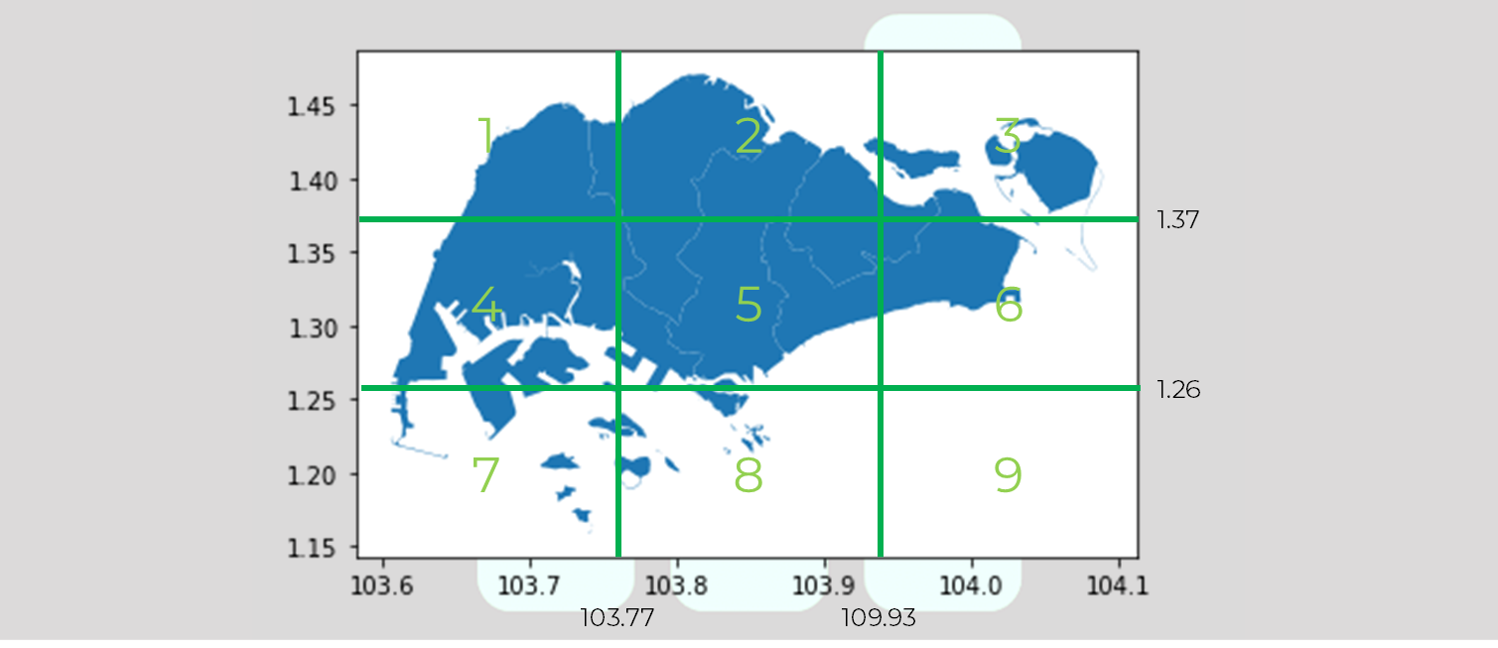

Singapore is divided into nine parts, based on its longitude and latitude.

A few things to take note of:
1. Left limit - 103.6
2. Right limit - 104.1
3. Upper limit - 1.48
4. Lower limit - 1.15

Use the numbers at the edge of the map as boundaries when sorting the coordinates.

Make sure the DataFrame has new columns that reflect the number of taxis available in different sectors throughout a day.

In [6]:
# Step 5: Sort the coordinates into the nine sectors
# declare nine empty lists
sector_1 = []
sector_2 = []
sector_3 = []
sector_4 = []
sector_5 = []
sector_6 = []
sector_7 = []
sector_8 = []
sector_9 = []

# start a for loop to loop through the list of coordinates in geometry.coordinates column
for row in data['geometry.coordinates']:

    # initialize nine variables with 0 to keep count of the available taxis
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0
    count_7 = 0
    count_8 = 0
    count_9 = 0
    
    # use another for loop to loop through the coordinate pairs in the list of coordinates
    for pairs in row:
    
        # if the first half of the coordinates is less or equals than 103.77 and the second half is equals to or more than 1.37
        c1 = pairs[0]
        c2 = pairs[1]
        
        if c1 <= 103.77 and c2 >= 1.37:
        
            # increment the count for sector 1 by 1
            count_1 += 1
            
        # else if the first half of the coordinates is less than 103.77 and the second half is equals to or more than 1.26 and is less than 1.37
        elif c1 <= 103.77 and 1.26 <= c2 < 1.37:
        
            # increment the count for sector 4 by 1
            count_4 += 1
            
        # keep going until done with all nine sectors
        elif c1 <= 103.77 and c2 < 1.26:
            count_7 += 1
        
        elif 103.77 <= c1 < 103.93 and c2 >= 1.37:
            count_2 += 1
            
        elif 103.77 <= c1 < 103.93 and 1.26 <= c2 < 1.37:
            count_5 += 1
        
        elif 103.77 <= c1 < 103.93 and c2 < 1.26:
            count_8 += 1
            
        elif c1 >= 103.93 and c2 >= 1.37:
            count_3 += 1
        
        elif c1 >= 103.93 and 1.26 <= c2 < 1.37:
            count_6 += 1
            
        else:
            count_9 += 1
    
    # append the counts of the free taxis in each in the nine lists
    sector_1.append(count_1)
    sector_2.append(count_2)
    sector_3.append(count_3)
    sector_4.append(count_4)
    sector_5.append(count_5)
    sector_6.append(count_6)
    sector_7.append(count_7)
    sector_8.append(count_8)
    sector_9.append(count_9)

# once all of the rows have been looped through, create new columns using the lists that have been created
data['sector_1'] = sector_1
data['sector_2'] = sector_2
data['sector_3'] = sector_3
data['sector_4'] = sector_4
data['sector_5'] = sector_5
data['sector_6'] = sector_6
data['sector_7'] = sector_7
data['sector_8'] = sector_8
data['sector_9'] = sector_9

In [7]:
data

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status,time,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,Feature,MultiPoint,"[[103.6267, 1.307992], [103.63226, 1.30884], [...",2018-12-31T23:59:44+08:00,5887,healthy,2019-01-01 00:00,167,979,81,409,3506,678,0,67,0
1,Feature,MultiPoint,"[[103.63213, 1.31121], [103.63766, 1.30045], [...",2019-01-01T00:04:44+08:00,4001,healthy,2019-01-01 00:05,102,496,39,251,2589,471,0,53,0
2,Feature,MultiPoint,"[[103.63145, 1.31125], [103.6376, 1.300248], [...",2019-01-01T00:09:44+08:00,5981,healthy,2019-01-01 00:10,157,1035,69,417,3546,680,0,77,0
3,Feature,MultiPoint,"[[103.63132, 1.3216], [103.63314, 1.32474], [1...",2019-01-01T00:14:45+08:00,5461,healthy,2019-01-01 00:15,158,920,68,375,3225,654,0,61,0
4,Feature,MultiPoint,"[[103.628, 1.31262], [103.63714, 1.29914], [10...",2019-01-01T00:19:45+08:00,5003,healthy,2019-01-01 00:20,136,900,62,358,2898,596,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,Feature,MultiPoint,"[[103.62689, 1.31369], [103.62953, 1.30178], [...",2019-01-30T23:39:40+08:00,5782,healthy,2019-01-30 23:40,233,1301,79,585,2591,986,0,7,0
8637,Feature,MultiPoint,"[[103.615898833333, 1.27034783333333], [103.62...",2019-01-30T23:44:40+08:00,5843,healthy,2019-01-30 23:45,220,1314,78,612,2645,961,0,13,0
8638,Feature,MultiPoint,"[[103.624481, 1.30293333333333], [103.62871, 1...",2019-01-30T23:49:40+08:00,5825,healthy,2019-01-30 23:50,214,1269,80,605,2684,960,0,13,0
8639,Feature,MultiPoint,"[[103.62935, 1.2973], [103.62964, 1.29373], [1...",2019-01-30T23:54:40+08:00,5783,healthy,2019-01-30 23:55,211,1228,88,590,2702,950,1,13,0


### Step 6: Turn the strings in 'time' column into a DataTime object
Next, get additional information from the "time", i.e. day of week, minute, hour. 

Currently, the values in the 'time' column are still strings so the values have to be converted into to a DateTime object.

In [8]:
# Step 6: convert the strings in "time" column into DateTime object
data['time'] = data['time'].astype('datetime64[ns]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8641 entries, 0 to 8640
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   type                        8641 non-null   object        
 1   geometry.type               8641 non-null   object        
 2   geometry.coordinates        8641 non-null   object        
 3   properties.timestamp        8641 non-null   object        
 4   properties.taxi_count       8641 non-null   int64         
 5   properties.api_info.status  8641 non-null   object        
 6   time                        8641 non-null   datetime64[ns]
 7   sector_1                    8641 non-null   int64         
 8   sector_2                    8641 non-null   int64         
 9   sector_3                    8641 non-null   int64         
 10  sector_4                    8641 non-null   int64         
 11  sector_5                    8641 non-null   int64       

### Step 7: Get 'day_of_week', 'minute', and 'hour' from 'time' column
Now that the column is a proper DateTime object, more information can be extracted.

Three new columns can be created with:
1. day_of_week - day of the week, i.e. 0 (Monday) - 6 (Sunday)
2. minute - minute in day
3. hour - hour in day

In [9]:
# Step 7: Get day of week, minute, hour from 'time' column
data['day_of_week'] = data['time'].dt.isocalendar().week
data['minute'] = data['time'].dt.minute
data['hour'] = data['time'].dt.hour
data

,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status,time,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9,day_of_week,minute,hour
0,Feature,MultiPoint,"[[103.6267, 1.307992], [103.63226, 1.30884], [...",2018-12-31T23:59:44+08:00,5887,healthy,2019-01-01 00:00:00,167,979,81,409,3506,678,0,67,0,1,0,0
1,Feature,MultiPoint,"[[103.63213, 1.31121], [103.63766, 1.30045], [...",2019-01-01T00:04:44+08:00,4001,healthy,2019-01-01 00:05:00,102,496,39,251,2589,471,0,53,0,1,5,0
2,Feature,MultiPoint,"[[103.63145, 1.31125], [103.6376, 1.300248], [...",2019-01-01T00:09:44+08:00,5981,healthy,2019-01-01 00:10:00,157,1035,69,417,3546,680,0,77,0,1,10,0
3,Feature,MultiPoint,"[[103.63132, 1.3216], [103.63314, 1.32474], [1...",2019-01-01T00:14:45+08:00,5461,healthy,2019-01-01 00:15:00,158,920,68,375,3225,654,0,61,0,1,15,0
4,Feature,MultiPoint,"[[103.628, 1.31262], [103.63714, 1.29914], [10...",2019-01-01T00:19:45+08:00,5003,healthy,2019-01-01 00:20:00,136,900,62,358,2898,596,0,53,0,1,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,Feature,MultiPoint,"[[103.62689, 1.31369], [103.62953, 1.30178], [...",2019-01-30T23:39:40+08:00,5782,healthy,2019-01-30 23:40:00,233,1301,79,585,2591,986,0,7,0,5,40,23
8637,Feature,MultiPoint,"[[103.615898833333, 1.27034783333333], [103.62...",2019-01-30T23:44:40+08:00,5843,healthy,2019-01-30 23:45:00,220,1314,78,612,2645,961,0,13,0,5,45,23
8638,Feature,MultiPoint,"[[103.624481, 1.30293333333333], [103.62871, 1...",2019-01-30T23:49:40+08:00,5825,healthy,2019-01-30 23:50:00,214,1269,80,605,2684,960,0,13,0,5,50,23
8639,Feature,MultiPoint,"[[103.62935, 1.2973], [103.62964, 1.29373], [1...",2019-01-30T23:54:40+08:00,5783,healthy,2019-01-30 23:55:00,211,1228,88,590,2702,950,1,13,0,5,55,23


### Step 8: Get the only parts needed
Having more and more columns, it is important to take the only ones needed. The raw coordinates can be ditched, and keep only the numbers of the taxis available in the nine sectors that have been defined. 

The DataFrame should only have the following <strong>(in this order)</strong>:
1. the time at which the API was called
2. taxi count
3. day_of_week
4. minute
5. hour
6. taxis available for sectors 1-9

In [10]:
# Step 8: Select only the necessary columns for the DataFrame
ordered_data = data[['time', 'properties.taxi_count', 'day_of_week', 'minute', 'hour', 
                     'sector_1', 'sector_2', 'sector_3', 'sector_4', 'sector_5', 
                     'sector_6', 'sector_7', 'sector_8', 'sector_9']]
ordered_data

,time,properties.taxi_count,day_of_week,minute,hour,sector_1,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,2019-01-01 00:00:00,5887,1,0,0,167,979,81,409,3506,678,0,67,0
1,2019-01-01 00:05:00,4001,1,5,0,102,496,39,251,2589,471,0,53,0
2,2019-01-01 00:10:00,5981,1,10,0,157,1035,69,417,3546,680,0,77,0
3,2019-01-01 00:15:00,5461,1,15,0,158,920,68,375,3225,654,0,61,0
4,2019-01-01 00:20:00,5003,1,20,0,136,900,62,358,2898,596,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8636,2019-01-30 23:40:00,5782,5,40,23,233,1301,79,585,2591,986,0,7,0
8637,2019-01-30 23:45:00,5843,5,45,23,220,1314,78,612,2645,961,0,13,0
8638,2019-01-30 23:50:00,5825,5,50,23,214,1269,80,605,2684,960,0,13,0
8639,2019-01-30 23:55:00,5783,5,55,23,211,1228,88,590,2702,950,1,13,0


### Step 9: Export DataFrame as CSV
Well done! Time to export DataFrame as a CSV for Part III. 

In [11]:
# Step 9: Export the DataFrame from Step 8 as CSV
ordered_data.to_csv ('Ordered_DataFrame.csv')